## Adding semantic context to SPAI: CLIP

**Approach 1:** Take an entire context of the whole image (you can resize, context is not disturbed). Then, add global context to the local patches to let spectral attention decide how to combine spectral info with context.

**Approach 2:** Use the context vector for entire image and context for local patches together to identify where local semantic features are in the image even without position embedding. 

### Approach 1

In [ ]:
# imports and constants
import matplotlib.pyplot as plt
from PIL import Image
import sys
import os

import torch
from torchvision import transforms

parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

from spai.models.backbones import CLIPBackbone


IMAGE_PATH = "./../data/images/fake_example.png"

In [2]:
def show_images_in_row(images, titles=None, figsize=(15, 5)):
    """
    Displays a list of image arrays in a single row.

    Args:
        images (list): List of image data (PIL.Image or NumPy arrays).
        titles (list, optional): Optional list of titles for each image.
        figsize (tuple): Size of the entire figure (width, height).
    """
    num_images = len(images)
    fig, axes = plt.subplots(1, num_images, figsize=figsize)
    
    if num_images == 1:
        axes = [axes]

    for i, (ax, img) in enumerate(zip(axes, images)):
        ax.imshow(img)
        ax.axis("off")
        if titles and i < len(titles):
            ax.set_title(titles[i], fontsize=10)

    plt.tight_layout()
    plt.show()


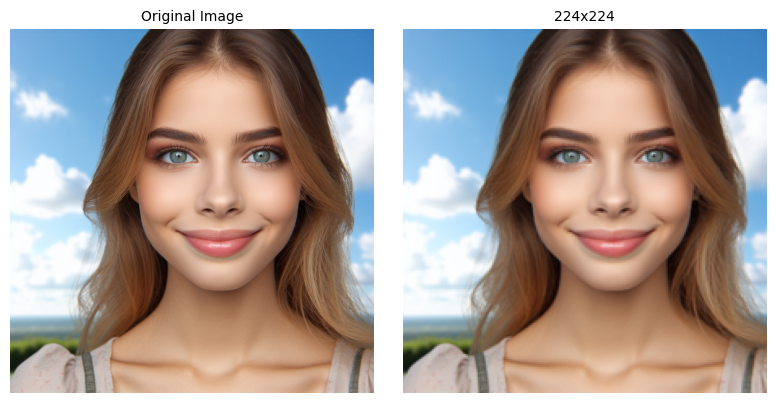

In [3]:
img_og = Image.open(IMAGE_PATH)
# resize to 224x224
img_resized = img_og.resize((224, 224))

show_images_in_row(
    [img_og, img_resized],
    titles=["Original Image", "224x224"],
    figsize=(8, 4)
)


In [4]:
clip_encoder = CLIPBackbone()

In [ ]:
# NOTE: we might need to normalize according to clip mean/std
img_tensor = transforms.ToTensor()(img_resized).unsqueeze(0)

img_encoding = clip_encoder(img_tensor)
# print encoding shape
print(f"Encoding shape: {img_encoding.shape}")

Encoding shape: torch.Size([1, 12, 196, 768])


In [11]:
# [1, 12, 196, 768] -> batch size, num layers, num patches, hidden size
# img_encoding

selected_encoding = img_encoding[:, -1, :, :]
selected_encoding.shape

torch.Size([1, 196, 768])